# Explore here

In [ ]:
Importar Dataset

In [13]:
import pandas as pd

# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
data = pd.read_csv(url)

# Mostrar las primeras filas y la información del conjunto de datos
data.head()




,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [15]:
# Mostrar los nombres de las columnas
list(data.columns)


['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

EDA: Variables escodigdas para la regresión: el Ingreso medio familar vs la prevalencia de diabetes.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seleccionar las variables de interés
X = data[['Median_Household_Income_2018']]
y = data['diabetes_prevalence']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Modelo Lasso

In [27]:
from sklearn.linear_model import Lasso, Ridge
# Modelo Lasso
lasso_model = Lasso(alpha=0.1, max_iter=300)
lasso_model.fit(X_train_scaled, y_train)
y_pred_train_lasso = lasso_model.predict(X_train_scaled)
y_pred_test_lasso = lasso_model.predict(X_test_scaled)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo Lasso
train_mse_lasso = mean_squared_error(y_train, y_pred_train_lasso)
test_mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
train_r2_lasso = r2_score(y_train, y_pred_train_lasso)
test_r2_lasso = r2_score(y_test, y_pred_test_lasso)

print(f'Lasso Train MSE: {train_mse_lasso}')
print(f'Lasso Test MSE: {test_mse_lasso}')
print(f'Lasso Train R2: {train_r2_lasso}')
print(f'Lasso Test R2: {test_r2_lasso}')

Lasso Train MSE: 3.4644097499517326
Lasso Test MSE: 3.9138885176590725
Lasso Train R2: 0.522729132946695
Lasso Test R2: 0.5133887137377913


In [37]:
import pickle

# Guardar modelo Lasso
with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso_model, file)

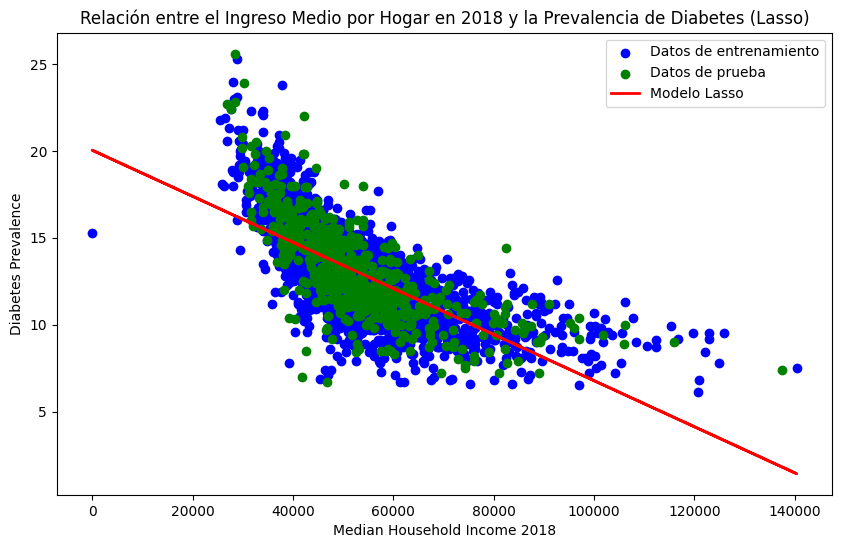

In [34]:
import matplotlib.pyplot as plt

# Grafico resultados Lasso
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')
plt.plot(X_train, y_pred_train_lasso, color='red', linewidth=2, label='Modelo Lasso')

plt.xlabel('Median Household Income 2018')
plt.ylabel('Diabetes Prevalence')
plt.title('Relación entre el Ingreso Medio por Hogar en 2018 y la Prevalencia de Diabetes (Lasso)')
plt.legend()
plt.show()

In [32]:
from sklearn.linear_model import Ridge

# Modelo Ridge
ridge_model = Ridge(alpha=0.1, max_iter=300)
ridge_model.fit(X_train_scaled, y_train)
y_pred_train_ridge = ridge_model.predict(X_train_scaled)
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

In [33]:
# Modelo Ridge
ridge_model = Ridge(alpha=0.1, max_iter=300)
ridge_model.fit(X_train_scaled, y_train)
y_pred_train_ridge = ridge_model.predict(X_train_scaled)
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

# Evaluar el modelo Ridge
train_mse_ridge = mean_squared_error(y_train, y_pred_train_ridge)
test_mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
train_r2_ridge = r2_score(y_train, y_pred_train_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)

print(f'Ridge Train MSE: {train_mse_ridge}')
print(f'Ridge Test MSE: {test_mse_ridge}')
print(f'Ridge Train R2: {train_r2_ridge}')
print(f'Ridge Test R2: {test_r2_ridge}')

Ridge Train MSE: 3.454409755980246
Ridge Test MSE: 3.8788246495405727
Ridge Train R2: 0.5241067718917897
Ridge Test R2: 0.5177481823045345


In [38]:
import pickle

# Guardar el modelo Ridge
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)

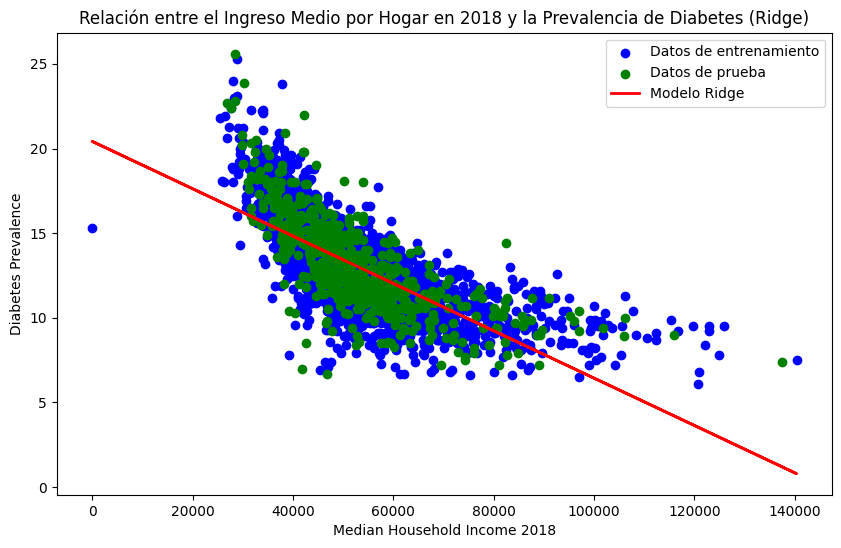

In [35]:
import matplotlib.pyplot as plt

# Grafico resultados Ridge
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')
plt.plot(X_train, y_pred_train_ridge, color='red', linewidth=2, label='Modelo Ridge')

plt.xlabel('Median Household Income 2018')
plt.ylabel('Diabetes Prevalence')
plt.title('Relación entre el Ingreso Medio por Hogar en 2018 y la Prevalencia de Diabetes (Ridge)')
plt.legend()
plt.show()

Resultado: Ambos modelos muestran una clara correlación negativa entre la prevalencia de diabetes y el ingreso medio familiar. A menor ingreso medio mayor prevalencia de diabetes.